In [1]:
#複数の教師データで決定係数が改善するかを確認する

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_other = pd.read_excel("./datas/Nagoya_Station_data(other).xlsx")
data_other=data_other.drop(['minute2sakae','minute2nagoya'],axis=1)
data_other

#data_other.hist()

,year,station_name,station_g_cd,ward_office,line_end,price2nagoya,price2sakae
0,1991,名古屋,1141101,0,0,0,200
1,1992,名古屋,1141101,0,0,0,200
2,1993,名古屋,1141101,0,0,0,200
3,1994,名古屋,1141101,0,0,0,200
4,1995,名古屋,1141101,0,0,0,200
5,1996,名古屋,1141101,0,0,0,200
6,1997,名古屋,1141101,0,0,0,200
7,1998,名古屋,1141101,0,0,0,200
8,1999,名古屋,1141101,0,0,0,200
9,2000,名古屋,1141101,0,0,0,200


In [2]:
data_josha = pd.read_excel("./datas/Nagoya_Station_data(josha).xlsx")
data_josha.describe()
#data_josha.hist()
#data_josha2 = pd.read_excel("./datas/data_josha2.xlsx")
#data_josha2

,year,station_no,station_cd,station_g_cd,josha_num,meijo,kamiida,higashiyama,tsurumai,sakuradori,...,shinkansen,tokaido,chuo,kansai,mei_nagoya,mei_tokoname,mei_inuyama,mei_seto,kintetsu,lines
count,4176.000000,4032.000000,4.176000e+03,4.176000e+03,3.913000e+03,734.0,78.0,550.0,498.0,431.0,...,25.0,155.0,150.0,66.0,375.0,250.0,125.0,300.0,175.0,4176.000000
mean,2003.395115,1229.319692,6.718968e+06,6.685202e+06,4.463554e+06,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.002874
std,7.204690,1673.978490,3.807039e+06,3.817268e+06,8.459787e+06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420426
min,1991.000000,0.000000,1.141101e+06,1.141101e+06,1.613000e+03,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,1997.000000,40.000000,3.000806e+06,3.000805e+06,9.958830e+05,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
50%,2004.000000,80.000000,9.951309e+06,9.951309e+06,2.132697e+06,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
75%,2010.000000,3004.000000,9.951502e+06,9.951428e+06,4.015563e+06,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,2016.000000,4037.000000,9.952309e+06,9.952309e+06,7.485043e+07,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000


In [3]:
#不要なカラムを削除
data_josha=data_josha.drop(['station_no','meijo','kamiida','higashiyama','tsurumai','sakuradori'],axis=1)
data_josha=data_josha.drop(['aonami','shinkansen','tokaido','chuo','kansai','kintetsu'],axis=1)
data_josha=data_josha.drop(['mei_nagoya','mei_inuyama','mei_tokoname','mei_seto'],axis=1)

#今だけこちらもdrop
#data_josha=data_josha.drop(['station_g_cd'],axis=1)

In [4]:
data_free = pd.read_excel("./datas/ekidata.jp/station20180330free.xlsx")

data_altitude = pd.read_excel("./datas/ekidata.jp/altitude201810131703.xlsx")
datas = pd.merge(data_free,data_altitude,on='station_cd')

datas.describe()

#不要な列をdrop

datas=datas.drop(['station_name_k', 'station_name_r','pref_cd','close_ymd','add','post','e_status','open_ymd','e_sort'], axis=1)

In [5]:
#fixed_altitudeとして、'Unnamed: 2'を採用。
#'Unnamed: 2'がNaNの場合は'Unnamed: 3'を使用
#'Unnamed: 3'もNaNの場合は0を設定

datas['fixed_altitude']=datas['Unnamed: 2'] 
datas.loc[datas['fixed_altitude'].isnull(),'fixed_altitude']     =datas['Unnamed: 3']
datas.loc[datas['fixed_altitude'].isnull(),'fixed_altitude']     = 0

In [6]:
#不要な列をdrop

datas=datas.drop(['altitude','Unnamed: 2','Unnamed: 3'], axis=1)
datas

,station_cd,station_g_cd,station_name,line_cd,lon,lat,fixed_altitude
0,1141101,1141101,名古屋,11411,136.881637,35.170694,9.401104
1,1141102,1141102,金山,11411,136.900517,35.142928,14.417255
2,1141103,1141103,鶴舞,11411,136.917436,35.156416,10.178897
3,1141104,1141104,千種,11411,136.930665,35.170168,22.121658
4,1141105,1141105,大曽根,11411,136.937161,35.191508,12.458329
5,1141106,1141106,新守山,11411,136.951207,35.207283,10.295541
6,1150228,1150228,大高,11502,136.940242,35.069244,6.393887
7,1150229,1150229,笠寺,11502,136.926321,35.095113,0.393098
8,1150230,1150230,熱田,11502,136.910502,35.130028,5.530992
9,1150231,1141102,金山,11502,136.900750,35.143323,10.601449


In [7]:
datas=datas.groupby(['station_g_cd'])[['lon','lat','fixed_altitude']].mean()
datas
#pd.merge(data_other,datas,on='station_g_cd')

,lon,lat,fixed_altitude
station_g_cd,,,
1141101,136.883022,35.169977,15.652107
1141102,136.901182,35.143172,12.174089
1141103,136.917093,35.156188,9.013464
1141104,136.930533,35.170396,24.091676
1141105,136.937178,35.191716,12.664352
1141106,136.951207,35.207283,10.295541
1150228,136.940242,35.069244,6.393887
1150229,136.926321,35.095113,0.393098
1150230,136.910502,35.130028,5.530992


In [8]:
datas=datas.reset_index()
datas

,station_g_cd,lon,lat,fixed_altitude
0,1141101,136.883022,35.169977,15.652107
1,1141102,136.901182,35.143172,12.174089
2,1141103,136.917093,35.156188,9.013464
3,1141104,136.930533,35.170396,24.091676
4,1141105,136.937178,35.191716,12.664352
5,1141106,136.951207,35.207283,10.295541
6,1150228,136.940242,35.069244,6.393887
7,1150229,136.926321,35.095113,0.393098
8,1150230,136.910502,35.130028,5.530992
9,1150232,136.891020,35.146981,2.997925


In [9]:
#datas=pd.merge(data_josha,datas,on='station_cd')

#datas=Nagoya_Station_data_other.join(datas)

data_josha.describe()

data_josha=data_josha.groupby(['station_g_cd','year'])[['josha_num','lines']].sum()
data_josha=data_josha.reset_index()


In [10]:
#乗車数0人のデータは落とす
data_josha=data_josha[data_josha['josha_num']!=0]
data_josha.describe()

,station_g_cd,year,josha_num,lines
count,3.222000e+03,3222.000000,3.222000e+03,3222.000000
mean,6.986470e+06,2003.755742,5.420821e+06,1.299814
std,3.646987e+06,7.168543,1.934224e+07,0.997105
min,1.141101e+06,1991.000000,2.712000e+03,1.000000
25%,3.001201e+06,1998.000000,9.662608e+05,1.000000
50%,9.951311e+06,2004.000000,2.068221e+06,1.000000
75%,9.951505e+06,2010.000000,3.750687e+06,1.000000
max,9.952309e+06,2016.000000,2.222740e+08,11.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1136e85c0>,
      dtype=object)

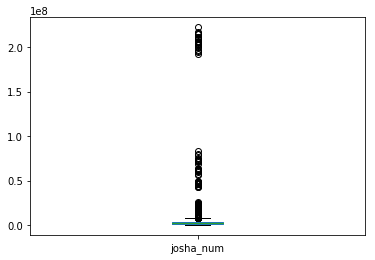

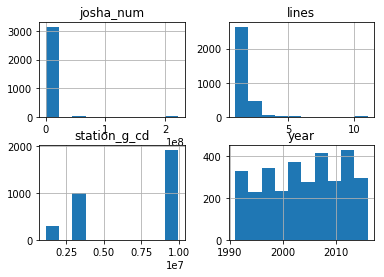

In [11]:
data_josha['josha_num'].plot.box()
data_josha.hist()

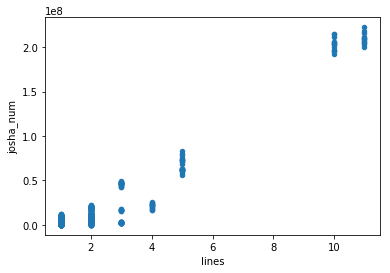

In [12]:
data_josha.plot(x='lines',y='josha_num', kind='scatter')

In [13]:
#data_josha = data_josha[data_josha['josha_num']<1e+07]
#外れ値処理 名古屋・栄・金山はデカすぎるので除外　栄くらいは残してもいいかもだけど。
data_josha=data_josha[data_josha['station_g_cd']!=1141101]#名古屋
data_josha=data_josha[data_josha['station_g_cd']!=1141102]#金山
data_josha=data_josha[data_josha['station_g_cd']!=3001201]#栄

data_josha.describe()

,station_g_cd,year,josha_num,lines
count,3.147000e+03,3147.000000,3.147000e+03,3147.000000
mean,7.111001e+06,2003.773753,3.010055e+06,1.183985
std,3.596224e+06,7.166553,3.496213e+06,0.448375
min,1.141103e+06,1991.000000,2.712000e+03,1.000000
25%,3.001203e+06,1998.000000,9.562360e+05,1.000000
50%,9.951313e+06,2004.000000,2.038146e+06,1.000000
75%,9.951505e+06,2010.000000,3.547297e+06,1.000000
max,9.952309e+06,2016.000000,2.560329e+07,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1140a1b70>,
      dtype=object)

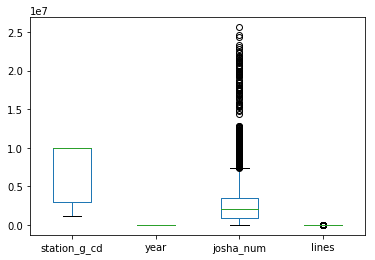

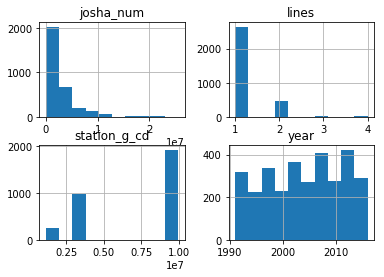

In [14]:
data_josha.plot.box()
data_josha.hist()

In [15]:
datas=pd.merge(data_josha,datas,on='station_g_cd')

datas

,station_g_cd,year,josha_num,lines,lon,lat,fixed_altitude
0,1141103,1991,11747915.0,2,136.917093,35.156188,9.013464
1,1141103,1992,12295952.0,2,136.917093,35.156188,9.013464
2,1141103,1993,12282099.0,2,136.917093,35.156188,9.013464
3,1141103,1994,12512243.0,2,136.917093,35.156188,9.013464
4,1141103,1995,12391892.0,2,136.917093,35.156188,9.013464
5,1141103,1996,12302335.0,2,136.917093,35.156188,9.013464
6,1141103,1997,12274055.0,2,136.917093,35.156188,9.013464
7,1141103,1998,11913373.0,2,136.917093,35.156188,9.013464
8,1141103,1999,12055519.0,2,136.917093,35.156188,9.013464
9,1141103,2000,12099594.0,2,136.917093,35.156188,9.013464


In [16]:
datas=pd.merge(datas,data_other,on=['station_g_cd','year'])

datas

,station_g_cd,year,josha_num,lines,lon,lat,fixed_altitude,station_name,ward_office,line_end,price2nagoya,price2sakae
0,1141103,1991,11747915.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
1,1141103,1992,12295952.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
2,1141103,1993,12282099.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
3,1141103,1994,12512243.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
4,1141103,1995,12391892.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
5,1141103,1996,12302335.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
6,1141103,1997,12274055.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
7,1141103,1998,11913373.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
8,1141103,1999,12055519.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200
9,1141103,2000,12099594.0,2,136.917093,35.156188,9.013464,鶴舞,0,0,240,200


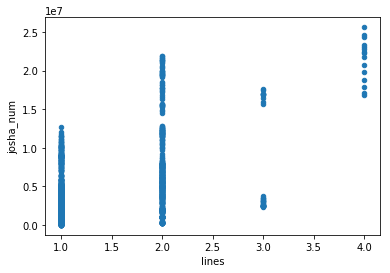

In [17]:
datas.plot(x='lines',y='josha_num', kind='scatter')

In [18]:
#datas = data_other.groupby(['station_g_cd','station_name','year'])\
#    [['ward_office','terminal','price2nagoya','price2sakae']].sum()

#datas = data_josha.groupby(['station_g_cd','station_name','year'])\
#    [['josha_num','lines']].sum()

#print(datas)
#print(datas2)

#np.corrcoef(datas2['lines'], datas2['josha_num'])

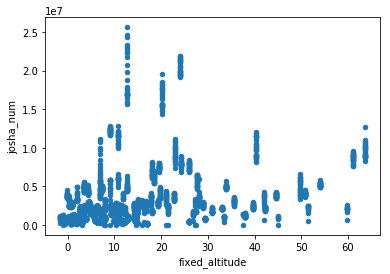

In [19]:
datas.plot(x='fixed_altitude',y='josha_num', kind='scatter')

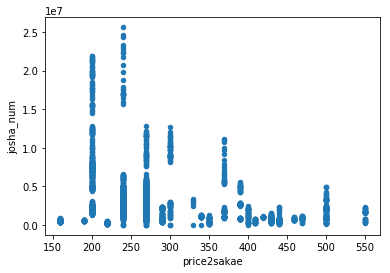

In [20]:
datas.plot(x='price2sakae',y='josha_num', kind='scatter')

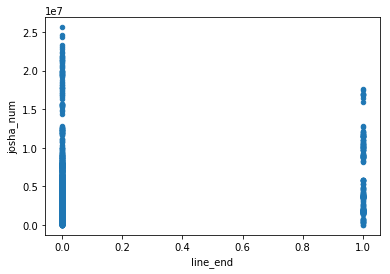

In [21]:
datas.plot(x='line_end',y='josha_num', kind='scatter')

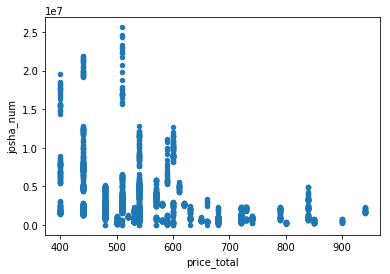

In [22]:
#datas['inverse_price2nagoya']=1/datas['price2nagoya']
#datas['inverse_price2sakae']=1/datas['price2sakae']
#これは大していい効果でなかったのでやめ

datas['price_total'] = datas['price2nagoya']+datas['price2sakae']

datas.plot(x='price_total',y='josha_num', kind='scatter')

In [23]:
datas['price_total'].isnull().sum()

#datas['price_total'].describe()

0

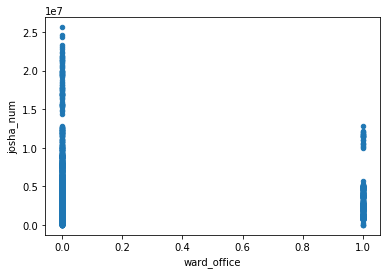

In [24]:
datas.plot(x='ward_office',y='josha_num', kind='scatter')

In [25]:
#各データの相関係数を見ます。
#今のところ、線の数くらいしかなさそう 0.53
#標高、栄と名駅からの料金の合算が大きい　-0.3
#駅の端か否か、もそこそこ大きい。0.22
#標高が大きい 0.3
#緯度経度はそこそこ大きいけど、標高や距離との影響も大きいので省く
datas.corr()

,station_g_cd,year,josha_num,lines,lon,lat,fixed_altitude,ward_office,line_end,price2nagoya,price2sakae,price_total
station_g_cd,1.000000,0.046662,0.017318,-0.210846,0.050832,0.080955,0.237165,0.019843,0.079062,-0.179212,-0.512504,-0.499479
year,0.046662,1.000000,-0.020258,0.036483,-0.014258,-0.048080,0.011865,-0.013141,-0.035036,0.001850,0.058276,0.047355
josha_num,0.017318,-0.020258,1.000000,0.556907,0.183342,0.193680,0.311936,-0.007344,0.216468,-0.126294,-0.324410,-0.322714
lines,-0.210846,0.036483,0.556907,1.000000,-0.103146,0.181508,-0.079432,-0.069314,0.031250,-0.240586,-0.133681,-0.229044
lon,0.050832,-0.014258,0.183342,-0.103146,1.000000,-0.007158,0.763626,-0.053832,0.021251,0.519067,-0.104488,0.181246
lat,0.080955,-0.048080,0.193680,0.181508,-0.007158,1.000000,0.226856,0.034874,-0.041999,-0.047404,-0.580531,-0.486501
fixed_altitude,0.237165,0.011865,0.311936,-0.079432,0.763626,0.226856,1.000000,-0.012679,0.062035,0.339524,-0.265768,-0.038678
ward_office,0.019843,-0.013141,-0.007344,-0.069314,-0.053832,0.034874,-0.012679,1.000000,0.197017,-0.067949,-0.053778,-0.077450
line_end,0.079062,-0.035036,0.216468,0.031250,0.021251,-0.041999,0.062035,0.197017,1.000000,0.039584,-0.023256,0.001646
price2nagoya,-0.179212,0.001850,-0.126294,-0.240586,0.519067,-0.047404,0.339524,-0.067949,0.039584,1.000000,0.130766,0.613641


In [62]:
# 使えそうな項目だけ選んでmlrに使う
datas_mlr=datas[[ \
                 'lines', \
                 'year', \
                 'fixed_altitude', \
                 'line_end', \
                 'ward_office', \
                 'price_total', \
                 'lon', \
                 'lat', \
                 'josha_num' \
                ]]

In [63]:
#正規化して実施
from sklearn import linear_model
clf = linear_model.LinearRegression(normalize=True)

In [64]:
# 説明変数に "josha_num" 以外を利用
datas_non_josha = datas_mlr.drop("josha_num", axis=1)
#datas_non_josha = datas[['lines','price2nagoya']]
#datas_non_josha.describe()

In [65]:
X = datas_non_josha.as_matrix()
X

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[2.00000000e+00, 1.99100000e+03, 9.01346445e+00, ...,
        4.40000000e+02, 1.36917093e+02, 3.51561880e+01],
       [2.00000000e+00, 1.99200000e+03, 9.01346445e+00, ...,
        4.40000000e+02, 1.36917093e+02, 3.51561880e+01],
       [2.00000000e+00, 1.99300000e+03, 9.01346445e+00, ...,
        4.40000000e+02, 1.36917093e+02, 3.51561880e+01],
       ...,
       [1.00000000e+00, 2.01300000e+03, 2.71653938e+01, ...,
        6.60000000e+02, 1.36998150e+02, 3.50944910e+01],
       [1.00000000e+00, 2.01400000e+03, 2.71653938e+01, ...,
        6.60000000e+02, 1.36998150e+02, 3.50944910e+01],
       [1.00000000e+00, 2.01500000e+03, 2.71653938e+01, ...,
        6.60000000e+02, 1.36998150e+02, 3.50944910e+01]])

In [66]:
# 目的変数に "josha_num" を利用
Y = datas_mlr['josha_num'].as_matrix()
Y

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([11747915., 12295952., 12282099., ...,  3006803.,  3161418.,
        3372040.])

In [67]:
# 予測モデルを作成
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [68]:
# 偏回帰係数
#路線数とline_endが強い。。。
print(pd.DataFrame({"Name":datas_non_josha.columns,"Coefficients":clf.coef_}).sort_values(by='Coefficients') )

             Name  Coefficients
7             lat -7.999737e+06
4     ward_office -1.520203e+05
1            year -1.540818e+04
5     price_total -6.875487e+03
2  fixed_altitude  8.476887e+04
6             lon  7.322415e+05
3        line_end  2.426016e+06
0           lines  4.139668e+06


In [69]:
# 切片 (誤差)
print(clf.intercept_)

212430589.58702838


In [70]:
#決定係数
#linesのみだと0.3なのはなぜだ？ 単回帰にはならない？⇨名駅とか抜いてたからだった。
#名駅とか入れると0.85
clf.score(X,Y)

0.5090137792885334